In [1]:
import os
import numpy as np

from common.trajectory import Trajectory
from planning.linear_planning_model import LinearPlanningModel

%load_ext autoreload
%autoreload 2

In [2]:
lpm_path = os.path.join(os.getcwd(), '..', 'models', 'quadrotor_linear_planning_model.mat')
LPM = LinearPlanningModel(lpm_path)

In [3]:
v_0 = np.array([0.0, 0.0])
a_0 = np.array([0.0, 0.0])
v_pk = np.array([1.94, -0.06])
k = np.vstack((v_0, a_0, v_pk))
P, V, A = LPM.compute_trajectory(k)

In [4]:
values = np.stack((P, V, A))
traj = Trajectory(LPM.time, values=values)
traj.compute_twist_controls()

array([[0.        , 0.        ],
       [0.02472886, 0.        ],
       [0.0943147 , 0.        ],
       [0.20185647, 0.        ],
       [0.34045308, 0.        ],
       [0.50320346, 0.        ],
       [0.68320652, 0.        ],
       [0.8735612 , 0.        ],
       [1.06736641, 0.        ],
       [1.25772109, 0.        ],
       [1.43772416, 0.        ],
       [1.60047453, 0.        ],
       [1.73907114, 0.        ],
       [1.84661291, 0.        ],
       [1.91619876, 0.        ],
       [1.94092761, 0.        ],
       [1.91619876, 0.        ],
       [1.84661291, 0.        ],
       [1.73907114, 0.        ],
       [1.60047453, 0.        ],
       [1.43772416, 0.        ],
       [1.25772109, 0.        ],
       [1.06736641, 0.        ],
       [0.8735612 , 0.        ],
       [0.68320652, 0.        ],
       [0.50320346, 0.        ],
       [0.34045308, 0.        ],
       [0.20185647, 0.        ],
       [0.0943147 , 0.        ],
       [0.02472886, 0.3091798 ],
       [0.

In [5]:
traj.compute_thetas()

In [6]:
traj.thetas

array([ 0.        , -0.03091798, -0.03091798, -0.03091798, -0.03091798,
       -0.03091798, -0.03091798, -0.03091798, -0.03091798, -0.03091798,
       -0.03091798, -0.03091798, -0.03091798, -0.03091798, -0.03091798,
       -0.03091798, -0.03091798, -0.03091798, -0.03091798, -0.03091798,
       -0.03091798, -0.03091798, -0.03091798, -0.03091798, -0.03091798,
       -0.03091798, -0.03091798, -0.03091798, -0.03091798, -0.03091798,
        0.        ])

In [12]:
V[:,1]

array([ 0.        , -0.00076444, -0.00291556, -0.00624   , -0.01052444,
       -0.01555556, -0.02112   , -0.02700444, -0.03299556, -0.03888   ,
       -0.04444444, -0.04947556, -0.05376   , -0.05708444, -0.05923556,
       -0.06      , -0.05923556, -0.05708444, -0.05376   , -0.04947556,
       -0.04444444, -0.03888   , -0.03299556, -0.02700444, -0.02112   ,
       -0.01555556, -0.01052444, -0.00624   , -0.00291556, -0.00076444,
        0.        ])

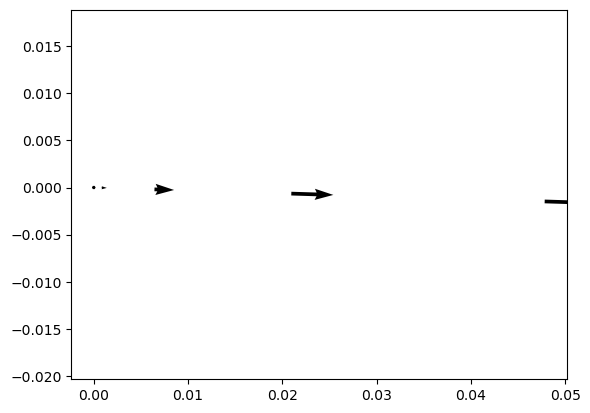

In [14]:
# Quiver plot of positions and velocities
import matplotlib.pyplot as plt
plt.quiver(P[:5,0], P[:5,1], V[:5,0], V[:5,1])
# Make axes equal
plt.axis('equal')
plt.show()

In [7]:
import common.params as params

DTHETA = 0.5

v_0 = np.array([1.0, 0.0])
theta = np.arctan2(v_0[1], v_0[0])
rands = np.random.rand(params.N_PLAN_MAX, 2)
thetas = theta - DTHETA + 2*DTHETA*rands[:,0]
rs = params.V_MAX_NORM*np.sqrt(rands[:,1])
V_peak = np.vstack((rs*np.cos(thetas), rs*np.sin(thetas))).T

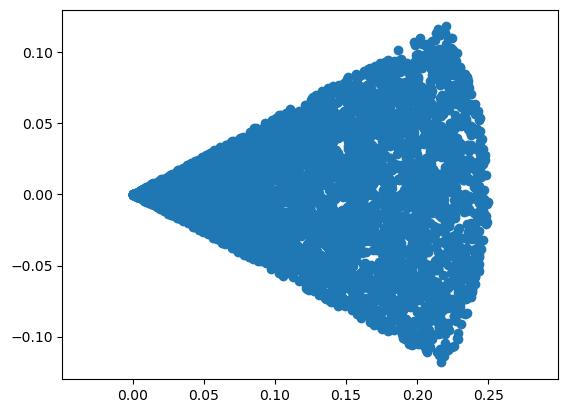

In [8]:
import matplotlib.pyplot as plt
# Plot v_peak samples
plt.scatter(V_peak[:,0], V_peak[:,1])
# Make axes equal
plt.axis('equal')
plt.show()